In [ ]:
image_kingfisher = "kingfisher.jpg"


In [ ]:
# Importing libraries for numerical computations and image processing
import numpy as np
import cv2

# Importing libraries for image I/O and visualization
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

# Importing libraries for statistical and texture feature analysis
from scipy.stats import skew
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern



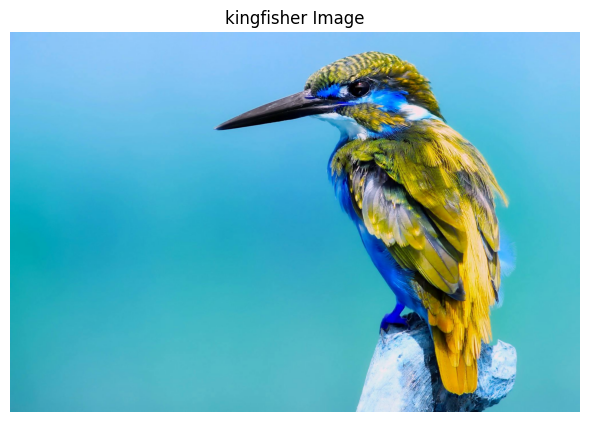

In [ ]:
#Load the image, using the correct filename (image_kingfisher)
image = cv2.imread(image_kingfisher)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image '{image_kingfisher}'. Please check the file path and ensure the image exists.")
else:
    #Convert from BGR to RGB (OpenCV loads in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #Set up the plot
    plt.figure(figsize=(6, 6))
    #Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.title("kingfisher Image")
    # Show the plot
    plt.tight_layout()
    plt.show()

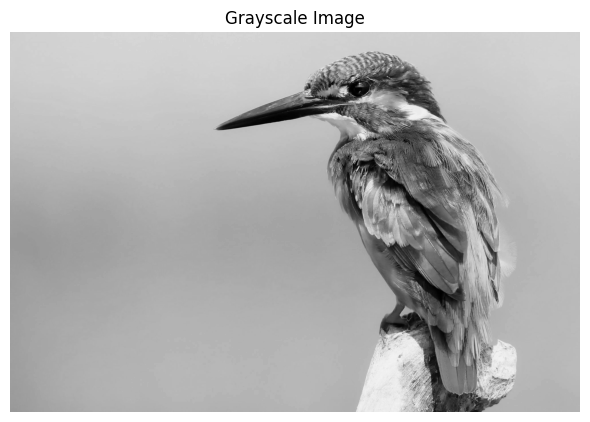

Grayscale Image Shape: (1333, 2000)
Sample Pixel Values (Top-5 Rows):
[[201 201 201 ... 206 206 206]
 [201 201 201 ... 206 206 206]
 [201 201 201 ... 206 206 206]
 [201 201 201 ... 206 206 206]
 [201 201 201 ... 206 206 206]]
Flattened Pixel Values (First 20):
[201 201 201 201 201 201 201 201 201 201 202 202 202 203 203 203 203 203
 203 203]


In [ ]:
# Convert the image to grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.tight_layout()
plt.show()

# Extract pixel values and print the shape of the grayscale image
print(f"Grayscale Image Shape: {image_gray.shape}")
print("Sample Pixel Values (Top-5 Rows):")
print(image_gray[:5, :])  # Display pixel values from the top 5 rows

# Flatten the grayscale image for further use
pixel_values = image_gray.flatten()

# Display flattened pixel values
print("Flattened Pixel Values (First 20):")
print(pixel_values[:20])  # Display the first 20 pixel values


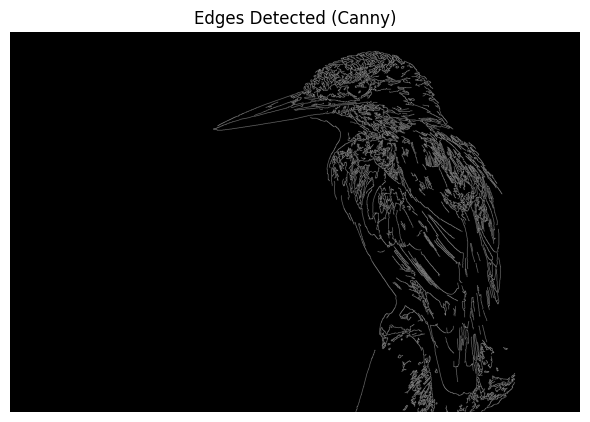

In [ ]:
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(image_gray, (5, 5), 1.4)

    # Apply Canny Edge Detection
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

    # Display only the Canny edge-detected image
    plt.figure(figsize=(6, 6))
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.title("Edges Detected (Canny)")
    plt.tight_layout()
    plt.show()

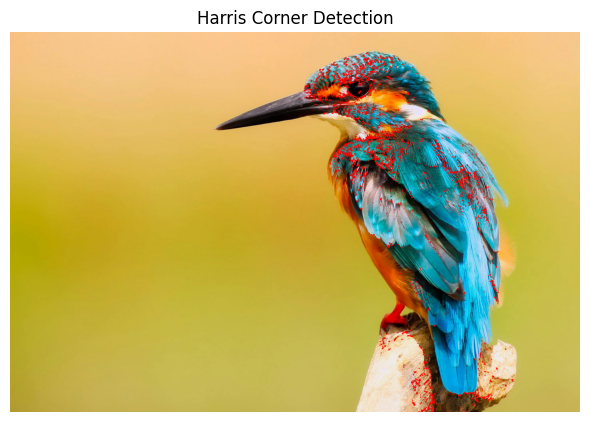

In [ ]:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert to float32 type as required by Harris Corner Detection
    gray_image = np.float32(gray_image)

    # Apply the Harris Corner Detection
    block_size = 2       # Neighborhood size considered for corner detection
    aperture_size = 3    # Aperture parameter for Sobel operator
    k = 0.04             # Harris detector free parameter
    corner_response = cv2.cornerHarris(gray_image, block_size, aperture_size, k)

    # Dilate the corner response to enhance visibility
    dilated_corners = cv2.dilate(corner_response, None)

    # Threshold the corner response to mark corners
    threshold = 0.01 * corner_response.max()
    detected_corners = image.copy()
    detected_corners[dilated_corners > threshold] = [0, 0, 255]  # Mark corners in red

    # Display only the corner-detected image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(detected_corners, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Harris Corner Detection")
    plt.tight_layout()
    plt.show()

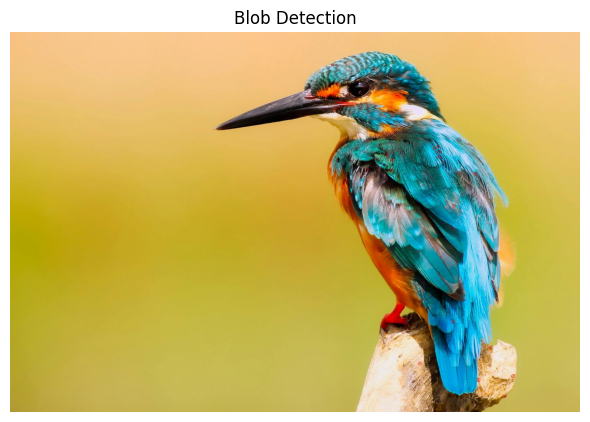

In [ ]:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Set up the SimpleBlobDetector parameters
    params = cv2.SimpleBlobDetector_Params()

    # Filter by Area
    params.filterByArea = True
    params.minArea = 50
    params.maxArea = 5000

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.1

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.87

    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.01

    # Create a blob detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs in the grayscale image
    keypoints = detector.detect(gray_image)

    # Draw detected blobs as red circles on the original image
    # The function cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the blob size
    blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the blob-detected image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Blob Detection")
    plt.tight_layout()
    plt.show()